<a href="https://colab.research.google.com/github/AliValizade/Machine_Learning/blob/main/ML_41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
n = 100
apple_width = np.random.normal(6, 1, n)
apple_lenght = np.random.normal(7, 1, n)
banana_width = np.random.normal(3, 1, n)
banana_lenght = np.random.normal(10, 1, n)
watermelon_width = np.random.normal(15, 1, n)
watermelon_lenght = np.random.normal(20, 1, n)

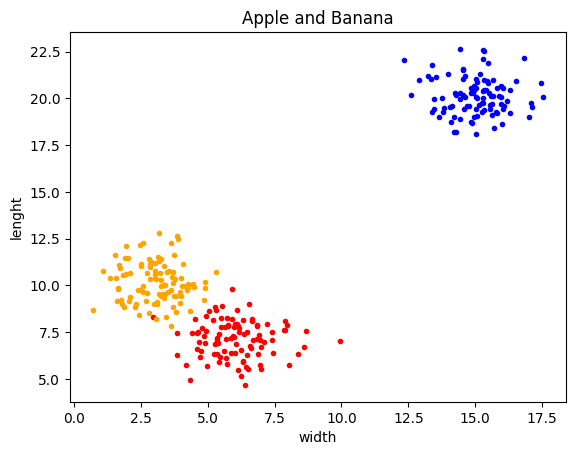

In [50]:
plt.scatter(apple_width, apple_lenght, c='red', marker='.')
plt.scatter(banana_width, banana_lenght, c='orange', marker='.')
plt.scatter(watermelon_width, watermelon_lenght, c='blue', marker='.')

plt.title('Apple and Banana')
plt.xlabel('width')
plt.ylabel('lenght')
plt.show()

# KNN (K Nearest Neigber)

- Apple : 0
- Banana : 1
- watermelon : 2

In [ ]:
width = np.concatenate((apple_width, banana_width, watermelon_width))
lenght = np.concatenate((apple_lenght, banana_lenght, watermelon_lenght))
X_train = np.array([width, lenght]).T
X_train

In [52]:
Y_apple =  np.zeros(n, dtype='int')
Y_banana = np.ones(n, dtype='int')
Y_watermelon = np.ones(n, dtype='int') * 2
Y_train = np.concatenate((Y_apple, Y_banana, Y_watermelon))
Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
def euqlidian_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

In [54]:
new_fruit = np.array([12, 16])

distances = []
for x in X_train:
  d = euqlidian_distance(new_fruit, x)
  distances.append(d)

In [55]:
k = 7

In [ ]:
np.sort(distances)

In [57]:
nearest_neighbors = np.argsort(distances)[0:k]

In [58]:
Y_train[nearest_neighbors]

array([2, 2, 2, 2, 2, 2, 2])

In [59]:
result = np.bincount(Y_train[nearest_neighbors])
result

array([0, 0, 7])

In [60]:
if np.argmax(result) == 0:
  print('Apple🍎')
elif np.argmax(result) == 1:
  print('Banana🍌')
else:
  print('Watermelon🍉')

Watermelon🍉
